## SCRAPING SITO DEL CENTRO RICERCA HPC

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "http://hpc.isti.cnr.it/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
None


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
lista_url

['#site-content',
 'https://www.iit.cnr.it/node/3178',
 'http://hpc.isti.cnr.it/projects/',
 'http://hpc.isti.cnr.it/our-team/',
 'http://hpc.isti.cnr.it/awards/',
 'https://www.isti.cnr.it/research/unit.php?unit=HPC',
 'https://twitter.com/HPCLab',
 None,
 'http://hpc.isti.cnr.it/contacts/',
 '#',
 'http://hpc.isti.cnr.it/available-positions/',
 'http://hpc.isti.cnr.it/research/',
 'http://hpc.isti.cnr.it/',
 'https://www.cnr.it/',
 'http://hpc.isti.cnr.it/publications/',
 'http://hpc.isti.cnr.it/research-products/']

In [4]:
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
        
lista_url2 = list(filter(lambda x: x.startswith('http://hpc.isti.cnr.it/'), res))
lista_url2=list(set(lista_url2))
lista_url2

['http://hpc.isti.cnr.it/projects/',
 'http://hpc.isti.cnr.it/our-team/',
 'http://hpc.isti.cnr.it/awards/',
 'http://hpc.isti.cnr.it/contacts/',
 'http://hpc.isti.cnr.it/available-positions/',
 'http://hpc.isti.cnr.it/research/',
 'http://hpc.isti.cnr.it/',
 'http://hpc.isti.cnr.it/publications/',
 'http://hpc.isti.cnr.it/research-products/']

In [5]:
indices=[0,2,3,5,6,7]
lista_url2 = [lista_url2[i] for i in indices]
lista_url2

['http://hpc.isti.cnr.it/projects/',
 'http://hpc.isti.cnr.it/awards/',
 'http://hpc.isti.cnr.it/contacts/',
 'http://hpc.isti.cnr.it/research/',
 'http://hpc.isti.cnr.it/',
 'http://hpc.isti.cnr.it/publications/']

In [6]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"site-content"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Projects', 'Awards', 'Contacts', 'Research', None, 'Publications']

In [7]:
texts[1]

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\nBest Paper Awards \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSalvatore Trani, Diego Ceccarelli, Claudio Lucchese, Salvatore Orlando, Raffaele Perego:\xa0SEL: A Unified Algorithm for Entity Linking and Saliency Detection. ACM DocEng 2016.C. Lucchese, F. M. Nardini, S. Orlando, R. Perego, N. Tonellotto, R. Venturini:\xa0QuickScorer: a Fast Algorithm to Rank Documents with Additive Ensembles of Regression Trees. ACM SIGIR 2015.Giuseppe Ottaviano, Rossano Venturini:\xa0Partitioned Elias-Fano Indexes. ACM SIGIR 2014.\xa0Igo Brilhante, Jose Antonio Macedo, Franco Maria Nardini, Chiara Renso, and Raffaele Perego:\xa0TripBuilder: A Tool for Recommending Sightseeing Tours. Best Demo paper at ECIR 2014.\xa0Nicola Tonellotto, Craig Macdonald and Iadh Ounis:\xa0Efficient dynamic pruning with proximity support. \xa0LSDS-IR 2010 SIGIR\xa0Workshop. \xa0\xa0Claudio Lucchese, Gianmarco De Francisci Morales:\xa0Large-scale data analysis on the cloud. XX

In [8]:
texts2 = []    
for element in texts:
    texts2.append(element.replace('\n',' ').replace('\xa0', ' '))

#print(texts2)

In [9]:
texts2[1]

'                               Best Paper Awards                 Salvatore Trani, Diego Ceccarelli, Claudio Lucchese, Salvatore Orlando, Raffaele Perego: SEL: A Unified Algorithm for Entity Linking and Saliency Detection. ACM DocEng 2016.C. Lucchese, F. M. Nardini, S. Orlando, R. Perego, N. Tonellotto, R. Venturini: QuickScorer: a Fast Algorithm to Rank Documents with Additive Ensembles of Regression Trees. ACM SIGIR 2015.Giuseppe Ottaviano, Rossano Venturini: Partitioned Elias-Fano Indexes. ACM SIGIR 2014. Igo Brilhante, Jose Antonio Macedo, Franco Maria Nardini, Chiara Renso, and Raffaele Perego: TripBuilder: A Tool for Recommending Sightseeing Tours. Best Demo paper at ECIR 2014. Nicola Tonellotto, Craig Macdonald and Iadh Ounis: Efficient dynamic pruning with proximity support.  LSDS-IR 2010 SIGIR Workshop.   Claudio Lucchese, Gianmarco De Francisci Morales: Large-scale data analysis on the cloud. XXIV Convegno Annuale del CMG-Italia, Roma,  25-26 maggio 2010. Fabrizio Silvestri: 

In [10]:
import nltk
words = set(nltk.corpus.words.words())

texts3 = []    
for element in texts2:
    element= " ".join(w for w in nltk.wordpunct_tokenize(element) if w.lower() in words or not w.isalpha())
    texts3.append(element)

In [11]:
texts3[1]

'Best Paper , , , , : : A Unified Algorithm for Entity Linking and Detection . 2016 . C . , F . M . , S . , R . , N . , R . : : a Fast Algorithm to Rank with Additive of Regression . 2015 . , : Partitioned - . 2014 . , , Franco Maria , , and : : A Tool for . Best paper at 2014 . , and : Efficient dynamic pruning with proximity support . - 2010 Workshop . , De : Large - scale data analysis on the cloud . - , , 25 - 26 2010 . : Out the Document Identifier Assignment Problem . 2007 . , : An Recommender System for Large Web . Web Intelligence 2004 . Best Paper Award Runner - up , , , , and : Task - based Sessions in Search Engine Query . 2011 . , , : Mining Top - K from Binary in presence of Noise . Conference on Data Mining ( 2010 ). Other C . , F . M . , S . , R . , N . , R . : : a Fast Algorithm to Rank with Additive of Regression . 2015 . Selected as a Notable Article in in 2015 by . : query to recommend mobile to . Yahoo Faculty Research and Engagement Award 2014 . : Compressed data f

### TEXT CLEANING

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

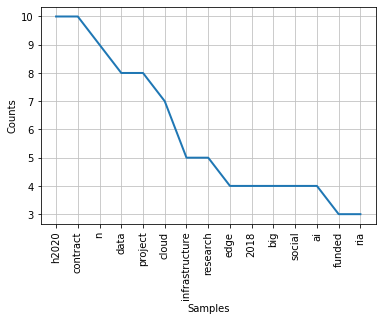

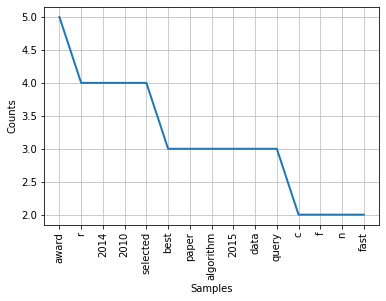

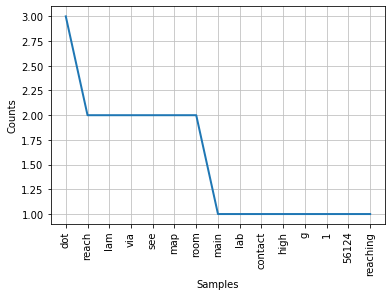

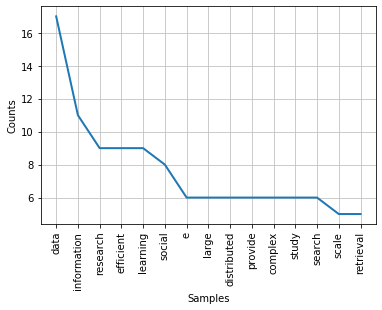

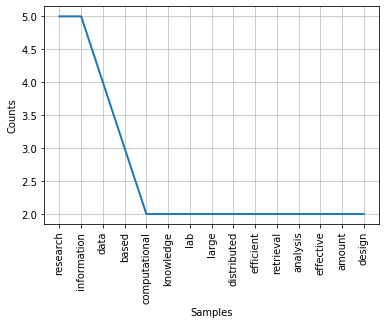

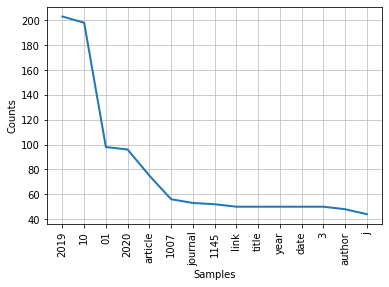

In [14]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts3[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [15]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

,Title,Freq_word
0,Projects,"{'ongoing': 1, 'currently': 1, 'four': 1, 'fun..."
1,Awards,"{'best': 3, 'paper': 3, 'unified': 1, 'algorit..."
2,Contacts,"{'main': 1, 'lab': 1, 'contact': 1, 'dot': 3, ..."
3,Research,"{'high': 1, 'performance': 2, 'laboratory': 1,..."
4,None,"{'high': 1, 'performance': 1, 'laboratory': 1,..."
5,Publications,{'20202019201820172016201520142013201220112010...


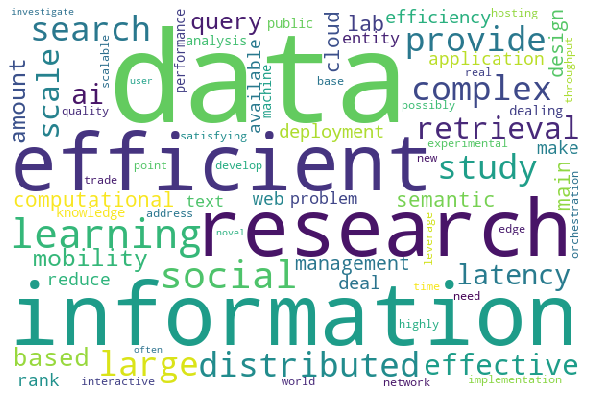

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[3]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

In [17]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)

str

In [18]:
tot_text=' '.join( [w for w in tot_text.split() if len(w)>1] )
tot_text = ''.join(i for i in tot_text if not i.isdigit())

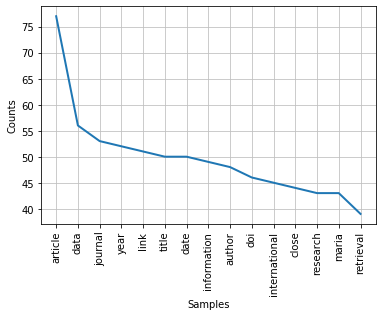

In [19]:
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

**salvo la stringa contenente il contenuto di tutte le pagine del sito in un file a parte**

In [20]:
textfile = open('HPC.txt', 'w')
textfile.write(tot_text)
textfile.close()

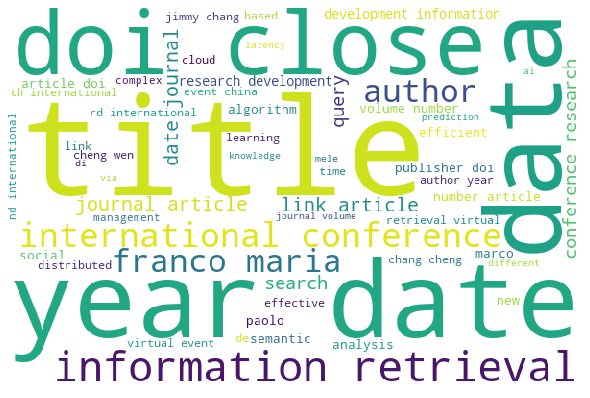

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()